In [10]:
import numpy as np
import pandas as pd 
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [11]:
datafile = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-002_CGM_Libre.csv")
time = datafile['mins'].to_numpy()
bg = datafile['BG'].to_numpy()
datafile['Date_Time'] = pd.to_datetime(datafile['Date_Time'])

1344795.0


Text(0.5, 1.0, 'overall blood glucose of subject 0002')

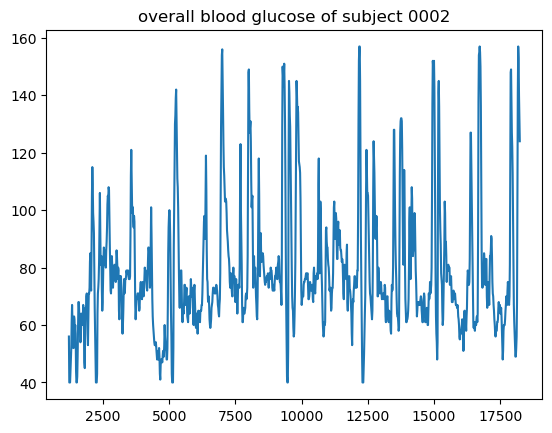

In [12]:
time = time[~np.isnan(time)]
bg = bg[~np.isnan(bg)]
area = auc(time, bg)
print(area)
plt.plot(time,bg)
plt.title('overall blood glucose of subject 0002')

In [13]:
tuples = zip(time,bg)
arr = np.asarray(list(tuples))

#find start time
timestring = '9/27/2021 2:24:00 PM'
target_time = datetime.strptime(timestring, '%m/%d/%Y %I:%M:%S %p')
theday = datafile[datafile['Date_Time'].dt.date == target_time.date()]
starttime = theday.iloc[0]['Date_Time']
startmins = theday.iloc[0]['mins']
minutes = int((target_time - starttime).total_seconds() / 60 + startmins)
print(minutes)

3744


11407.5
7312.5


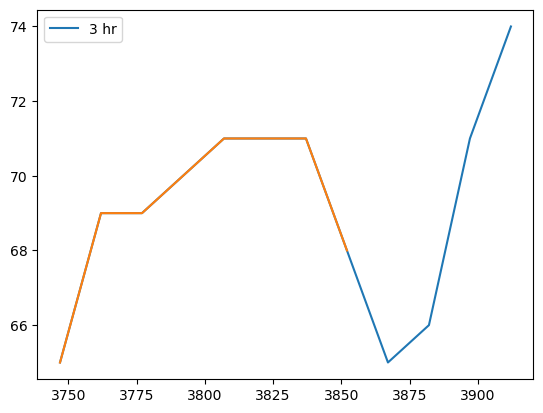

In [14]:
timeframe = 180
#filter to time interval
filtered = arr[arr[:,0] >= minutes]
filtered = filtered[filtered[:,0] <= minutes + timeframe]
plt.plot(filtered[:,0], filtered[:,1], label = "3 hr")
plt.legend()
area = auc(filtered[:,0], filtered[:,1])
print(area)

filtered = filtered[filtered[:,0] <= minutes + 120]
plt.plot(filtered[:,0], filtered[:,1], label = "2 hr")

#calculate iauc for that time interval
area = auc(filtered[:,0], filtered[:,1])
print(area)

In [15]:
def iaucAll(timestring):
    target_time = datetime.strptime(timestring, '%m/%d/%Y %H:%M')
    theday = datafile[datafile['Date_Time'].dt.date == target_time.date()]
    starttime = theday.iloc[0]['Date_Time']
    minutes = int((target_time - starttime).total_seconds() / 60 + theday.iloc[0]['mins'])

    #filter to time interval
    filtered = arr[arr[:,0] >= minutes]
    filtered = filtered[filtered[:,0] <= minutes + 180]
    plt.plot(filtered[:,0], filtered[:,1], label = "3 hr")
    plt.legend()
    area = auc(filtered[:,0], filtered[:,1])
    print("3 hr:" ,area)

    filtered = filtered[filtered[:,0] <= minutes + 120]
    plt.plot(filtered[:,0], filtered[:,1], label = "2 hr")
   
    #calculate iauc for that time interval
    area = auc(filtered[:,0], filtered[:,1])
    print("2 hr" ,area)
    plt.show()


9/26/2021 10:03
3 hr: 14475.0
2 hr 10380.0


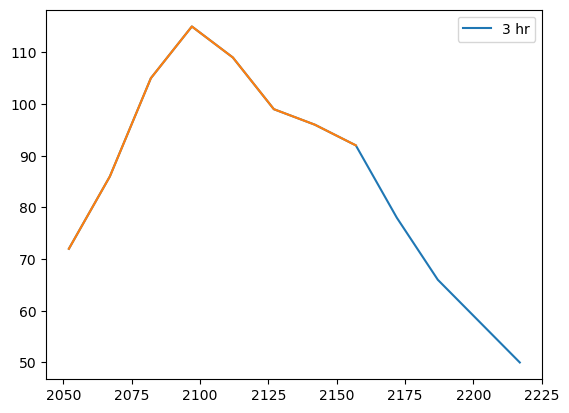


9/26/2021 13:27
3 hr: 13305.0
2 hr 7747.5


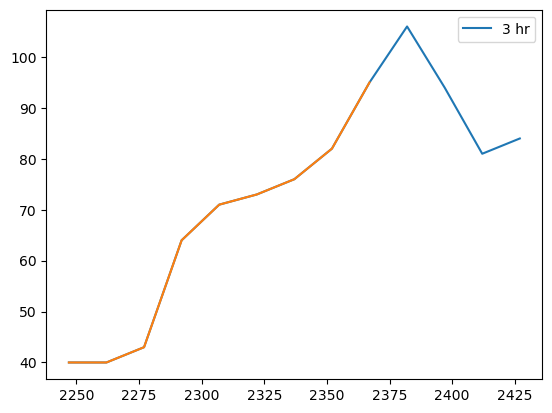


9/26/2021 17:14
3 hr: 13755.0
2 hr 8595.0


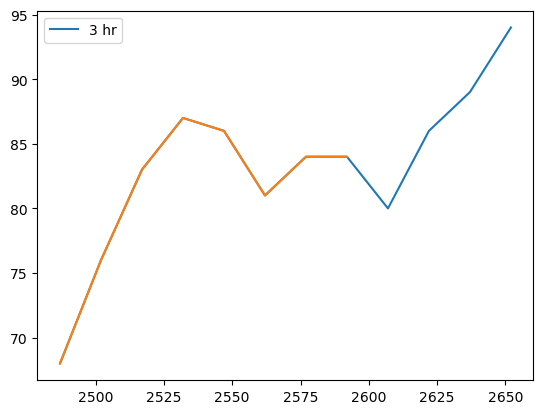


9/27/2021 10:33
3 hr: 16687.5
2 hr 10890.0


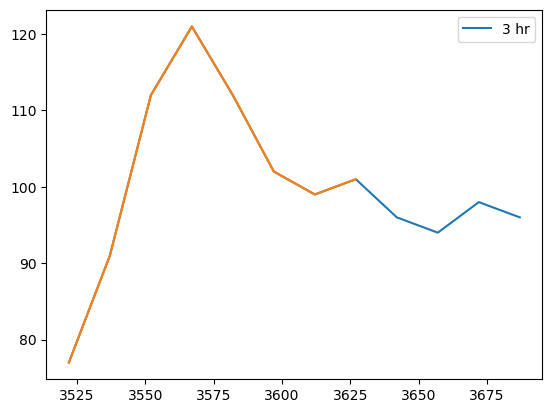


9/27/2021 14:24
3 hr: 11407.5
2 hr 7312.5


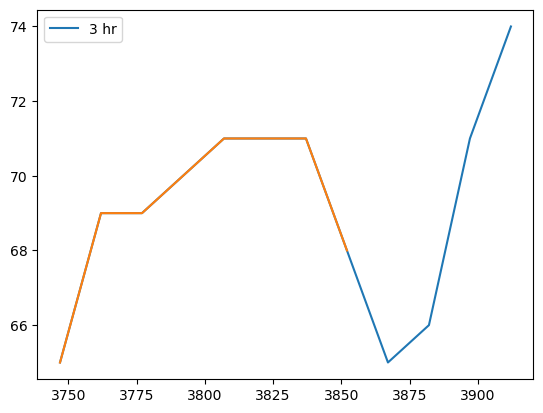


9/27/2021 19:34
3 hr: 12967.5
2 hr 8085.0


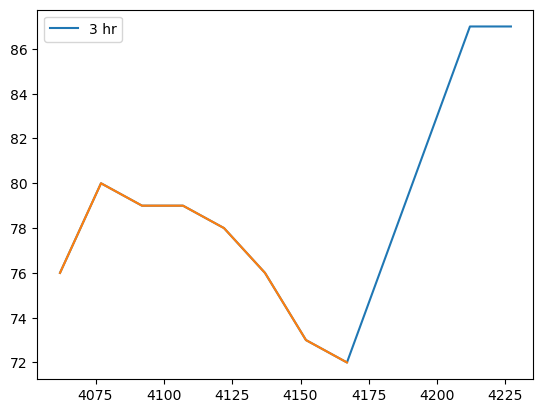


9/28/2021 9:41
3 hr: 12960.0
2 hr 7755.0


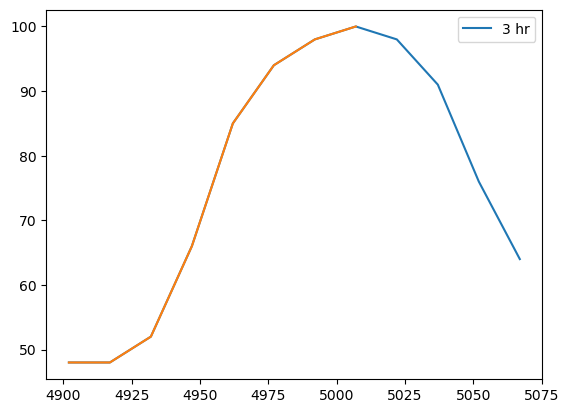


9/28/2021 13:15
3 hr: 17220.0
2 hr 9157.5


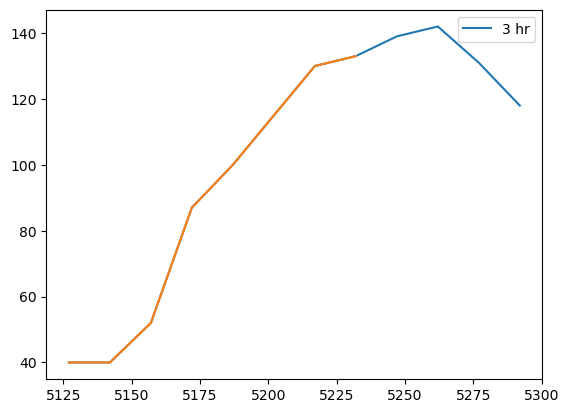


9/28/2021 18:03
3 hr: 11460.0
2 hr 7462.5


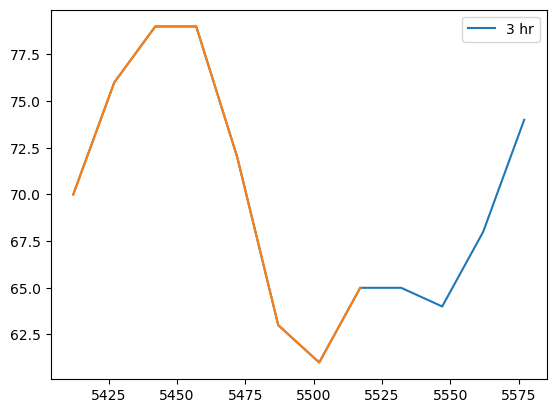


9/29/2021 9:28
3 hr: 14182.5
2 hr 10012.5


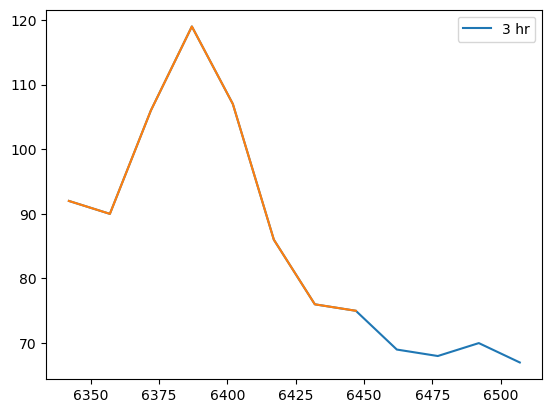


9/29/2021 13:05
3 hr: 11250.0
2 hr 6900.0


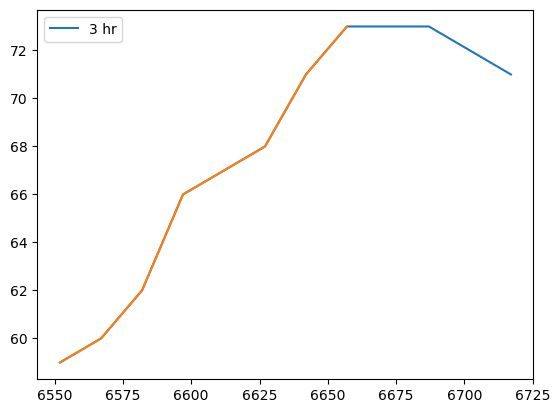


9/29/2021 18:03
3 hr: 16995.0
2 hr 8137.5


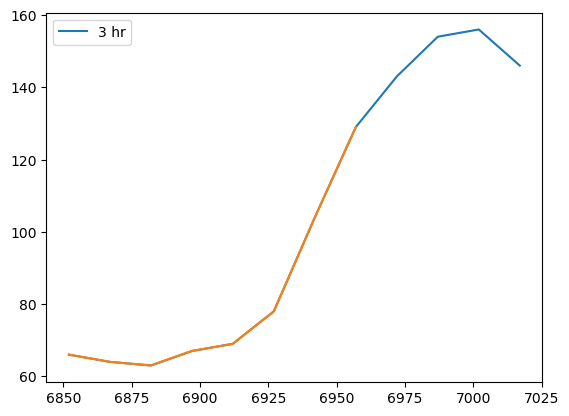


9/30/2021 7:35
3 hr: 13462.5
2 hr 9645.0


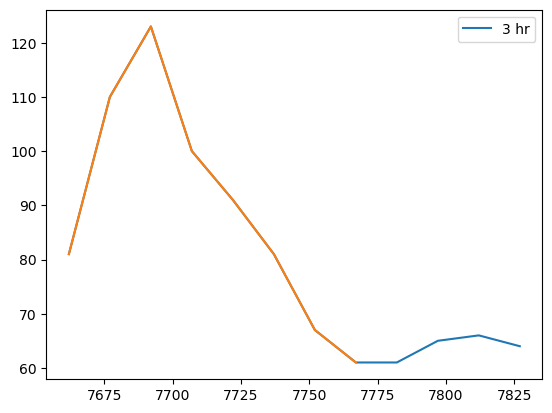


9/30/2021 12:25
3 hr: 20115.0
2 hr 12915.0


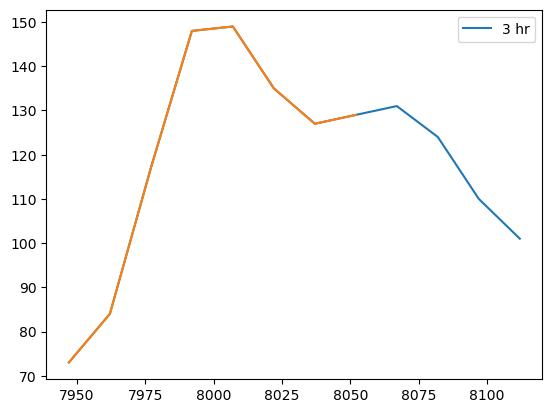


9/30/2021 18:54
3 hr: 14902.5
2 hr 9742.5


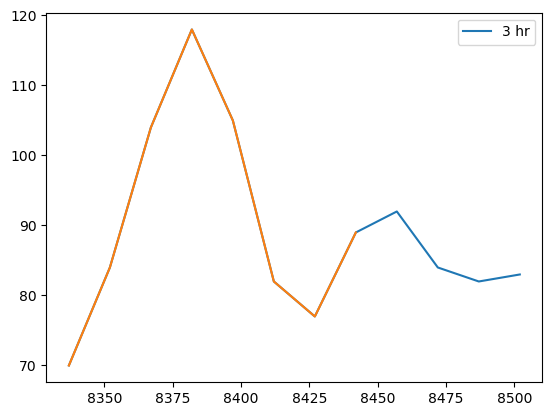


10/1/2021 9:55
3 hr: 21180.0
2 hr 13635.0


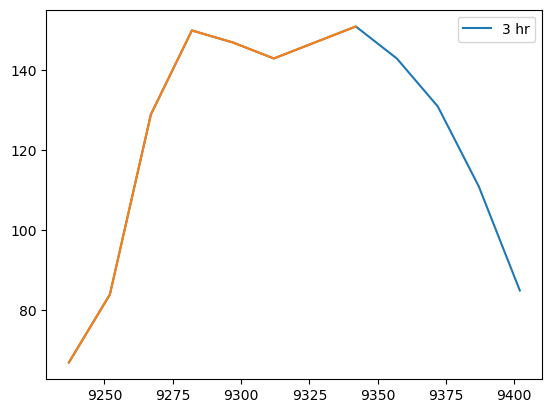


10/1/2021 13:49
3 hr: 17505.0
2 hr 11940.0


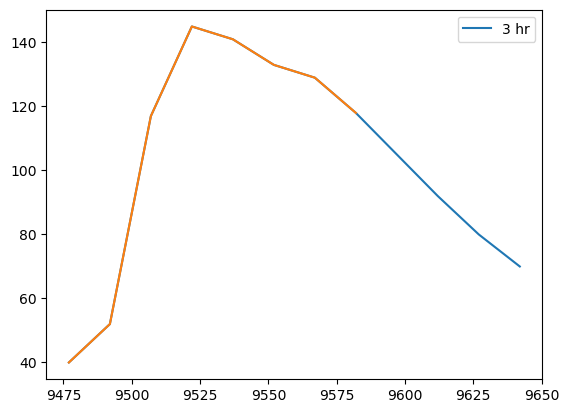


10/1/2021 18:17
3 hr: 20197.5
2 hr 12667.5


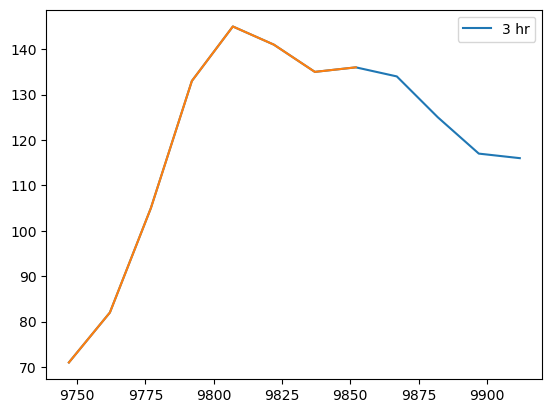


10/2/2021 8:48
3 hr: 15045.0
2 hr 10200.0


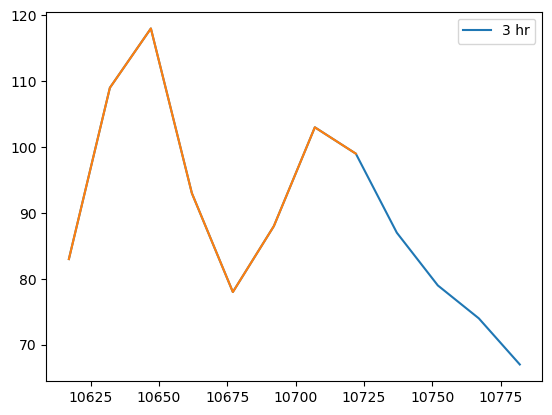


10/2/2021 13:16
3 hr: 13732.5
2 hr 9000.0


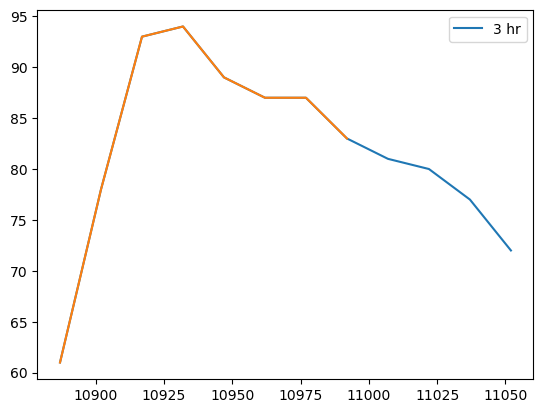


10/2/2021 18:50
3 hr: 15367.5
2 hr 10072.5


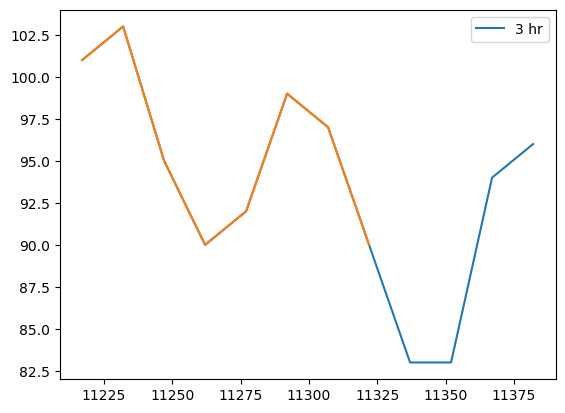


10/3/2021 9:59
3 hr: 18082.5
2 hr 14295.0


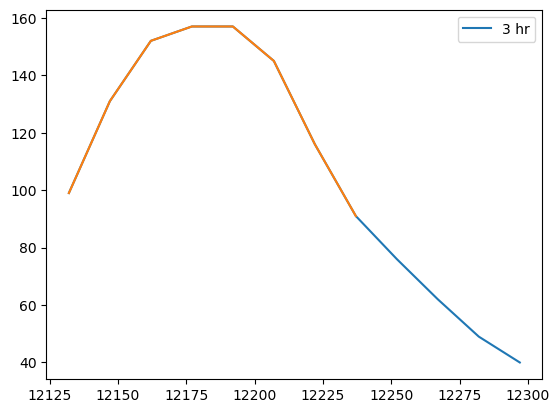


10/3/2021 14:30
3 hr: 16327.5
2 hr 10927.5


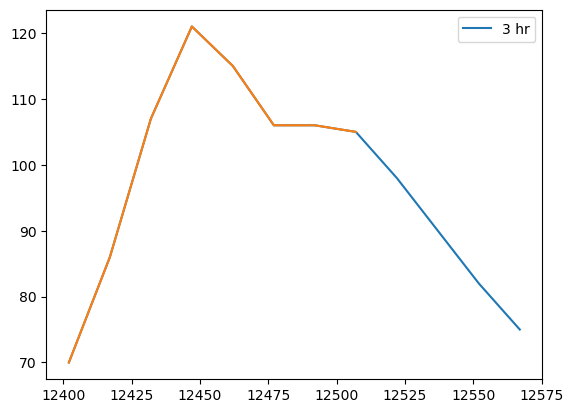


10/3/2021 19:04
3 hr: 16500.0
2 hr 10852.5


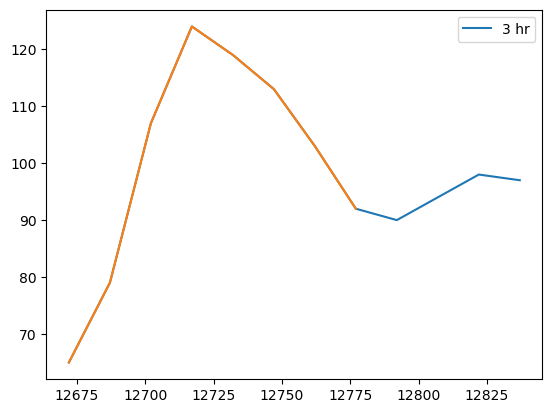


10/4/2021 8:09
3 hr: 15292.5
2 hr 11077.5


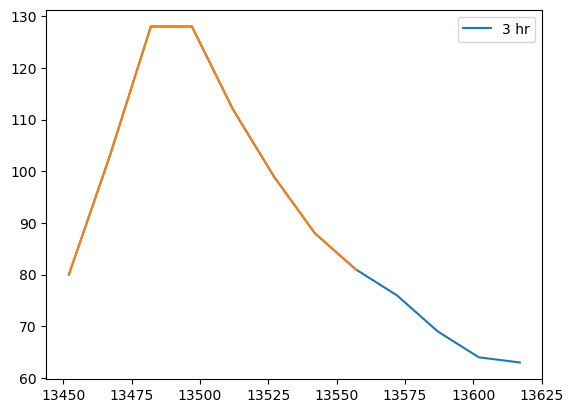


10/4/2021 15:45
3 hr: 11535.0
2 hr 6615.0


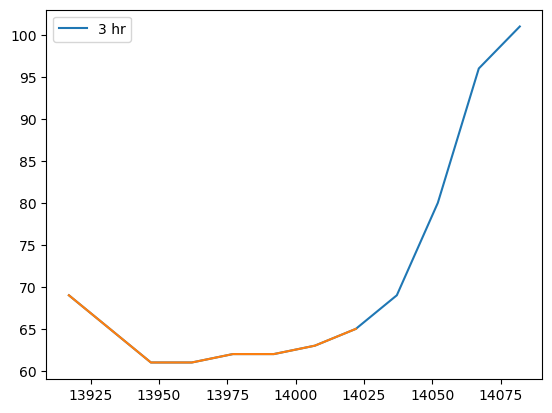


10/4/2021 17:58
3 hr: 15217.5
2 hr 9600.0


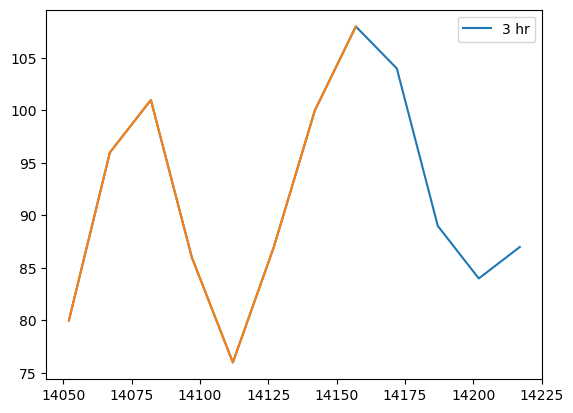


10/5/2021 8:23
3 hr: 20317.5
2 hr 14332.5


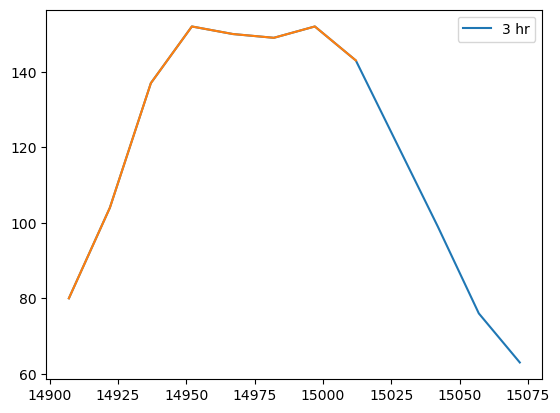

In [16]:
#read entire file and calculate
mldata = pd.read_csv("C:\\Users\\namil\\Downloads\\002.csv").dropna()
mldata['Meal Time'] = mldata['Meal Time'].to_numpy()
for i in mldata['Meal Time']:
        print('\n' + i)
        iaucAll(str(i))